In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

## BER Graph

#### Examine 5 runs for dataset

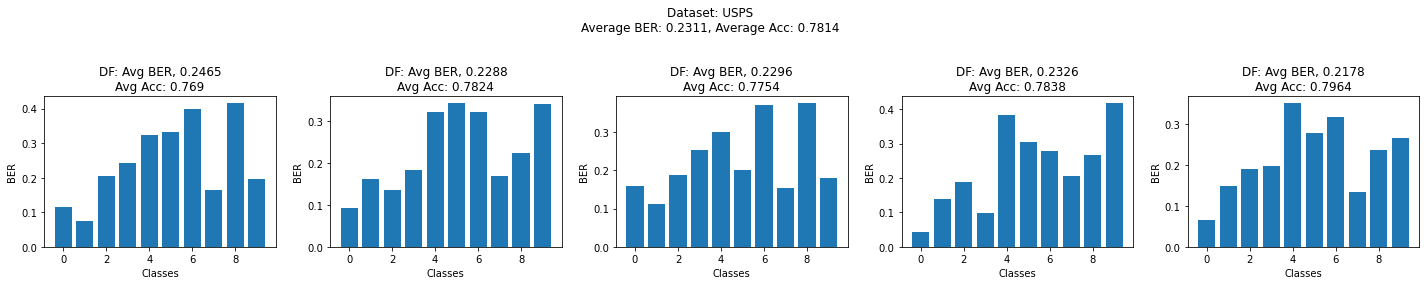

In [87]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


fig, axes= plt.subplots(1,5)
i=0; j=0
dataset= "BASEHOCK"
folder_dict={"Baseline":"Baseline", "DF":"DF", "NFS":"NFS","Weight":"Weight", "Grad":"Grad"}
model="DF"
epoch=100

plt.suptitle("Dataset: "+dataset )
# fig.set_figheight(5)
fig.set_figwidth(20)

avg_ber= []
avg_acc= []
for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{folder_dict[model]}/scikit_feat-{model}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{folder_dict[model]}/scikit_feat-{model}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[j].bar([i for i in range(len(ber))], ber)
    axes[j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[j].set_xlabel("Classes")
    axes[j].set_ylabel("BER")
    j += 1
    
    avg_ber.append(np.mean(ber))
    avg_acc.append(np.mean(dictionary['accuracy']))
plt.suptitle(f"Dataset: {dataset}\nAverage BER: {round(np.mean(avg_ber),4)}, Average Acc: {round(np.mean(avg_acc), 4)}\n" )

plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

# Baseline

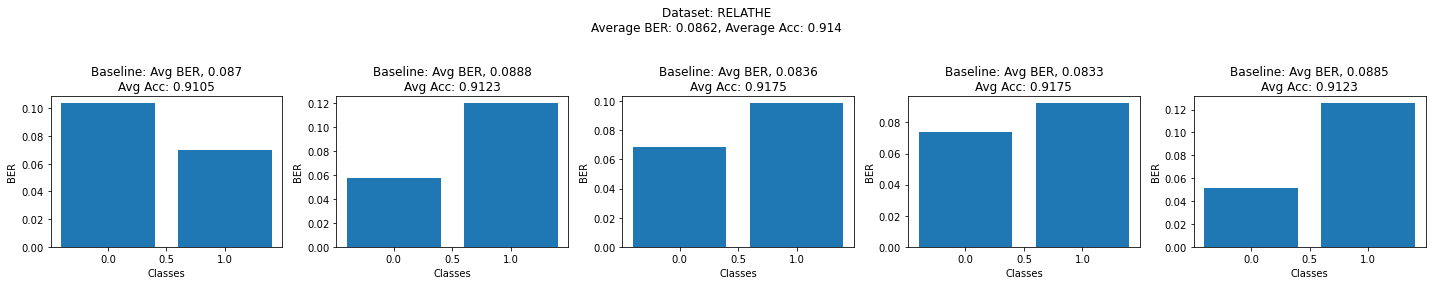
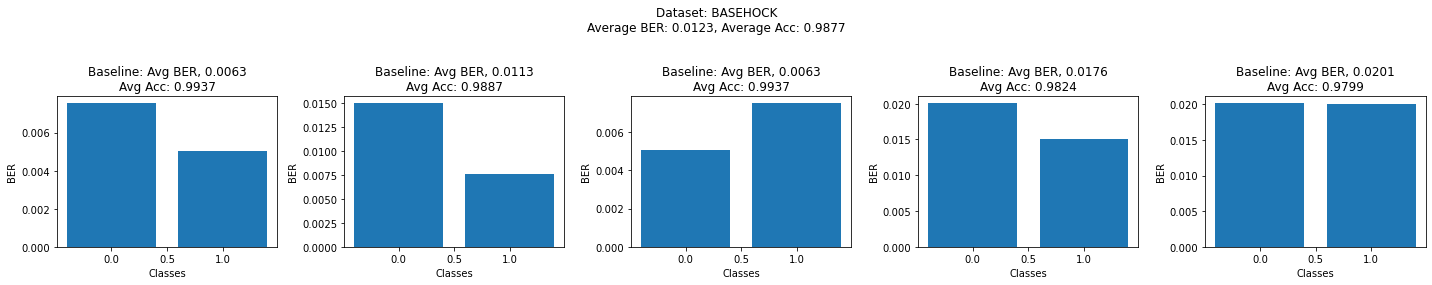
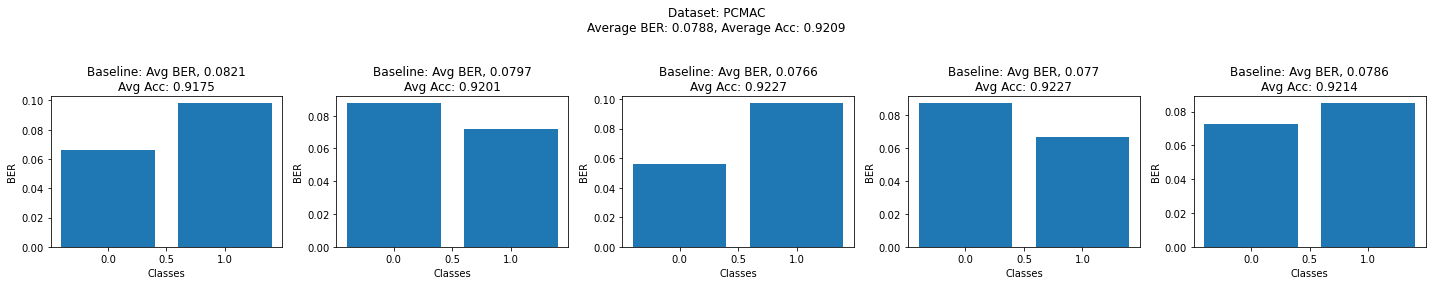

# DF

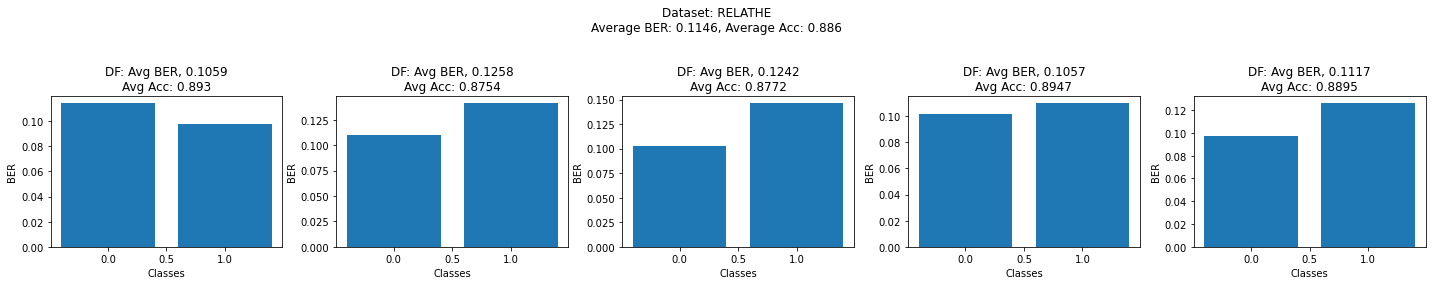
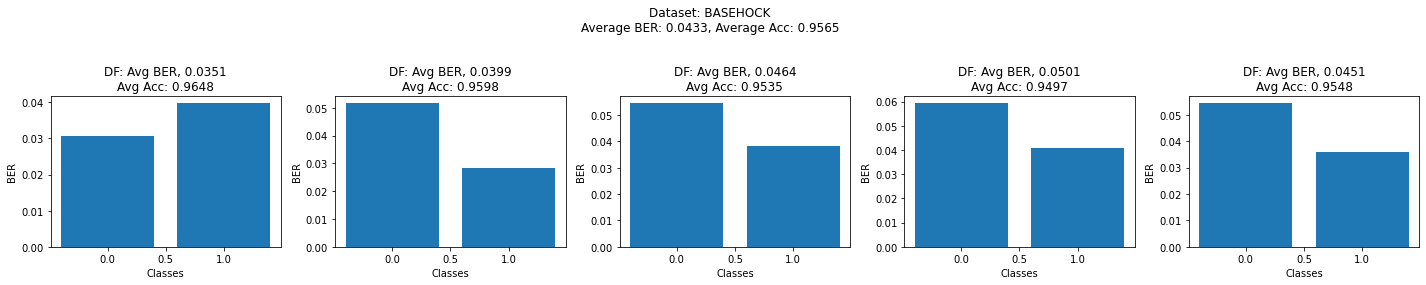
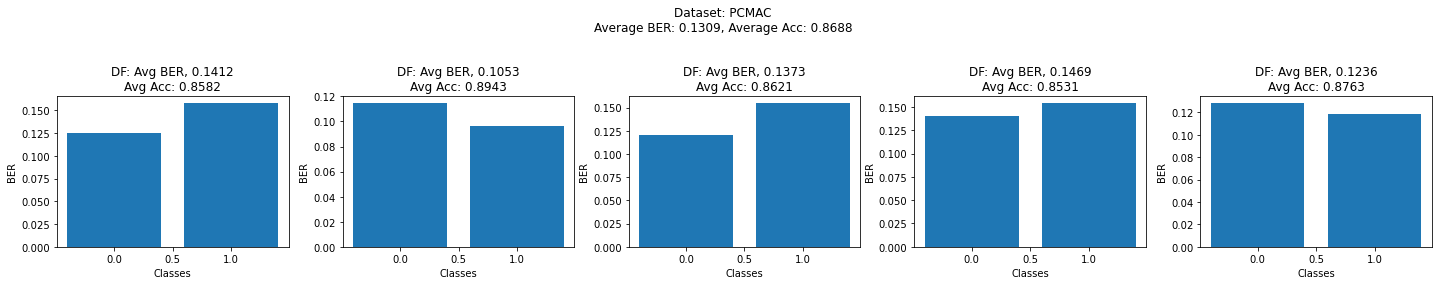

# NFS

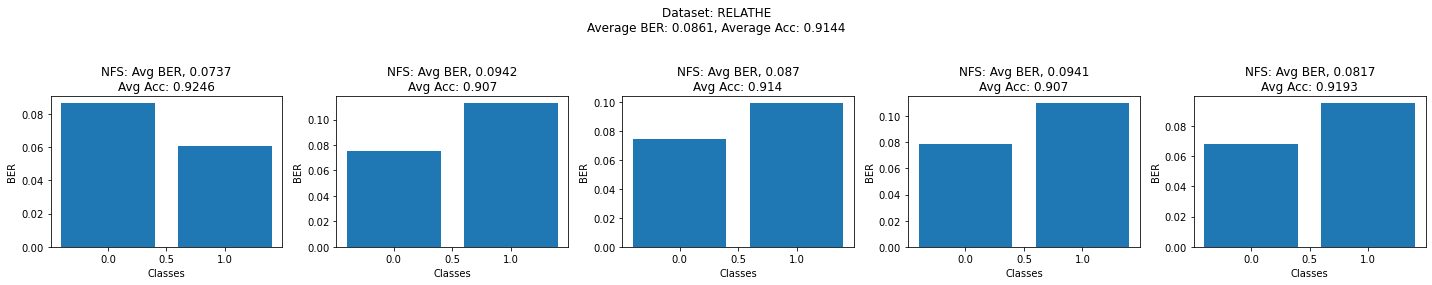
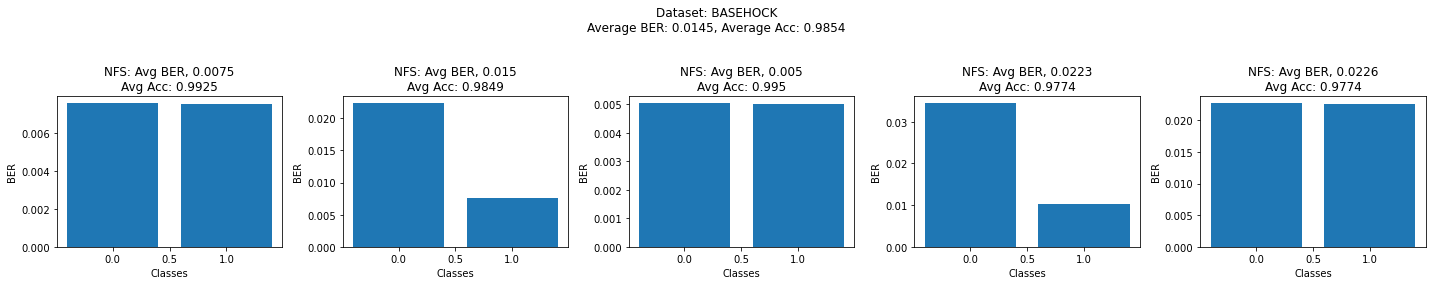
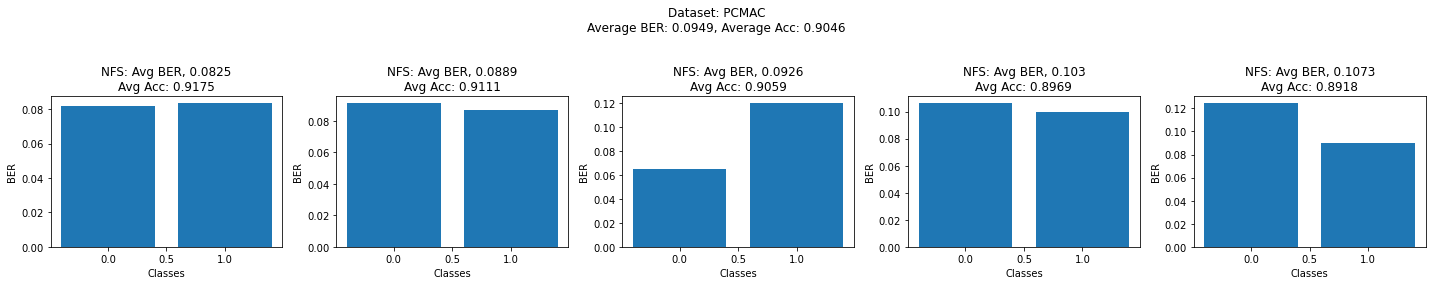

# Weight

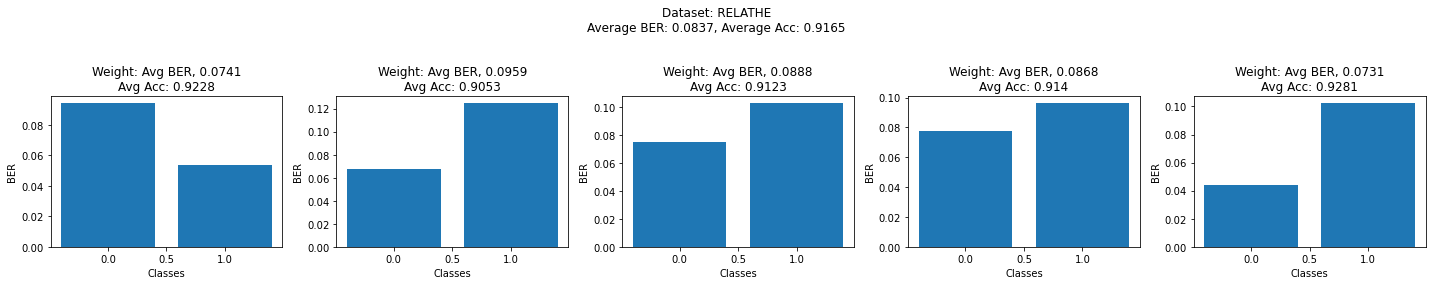
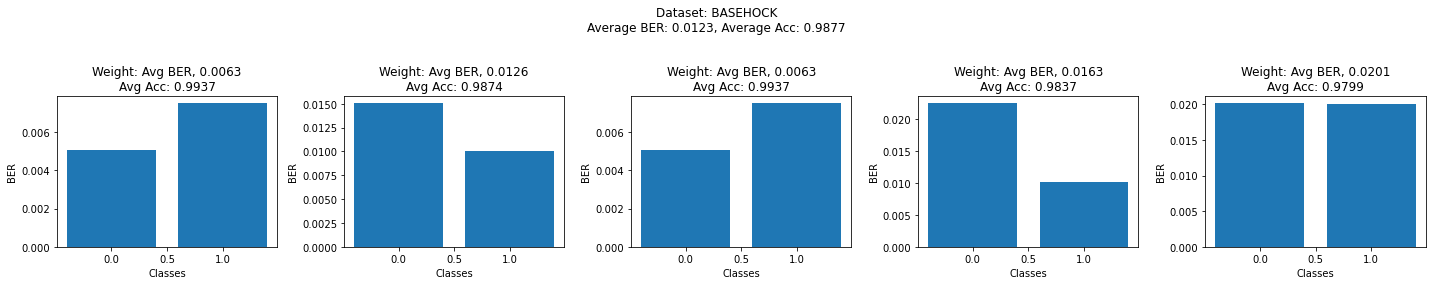
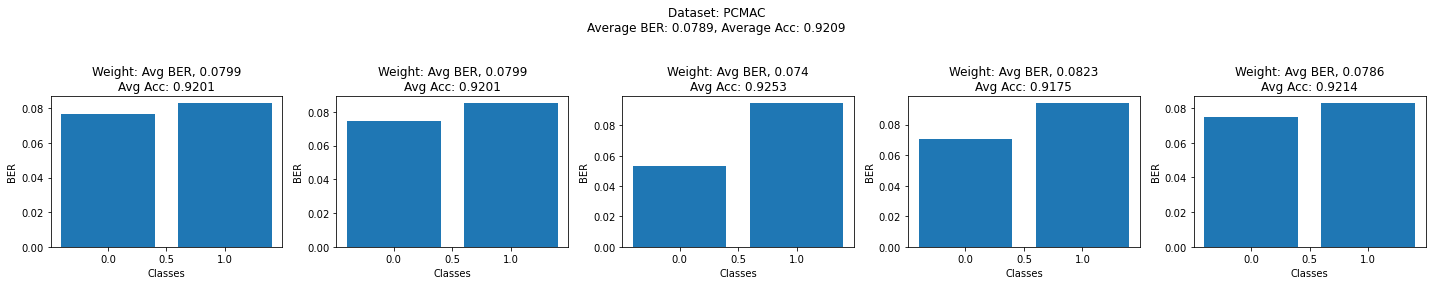

# Grad

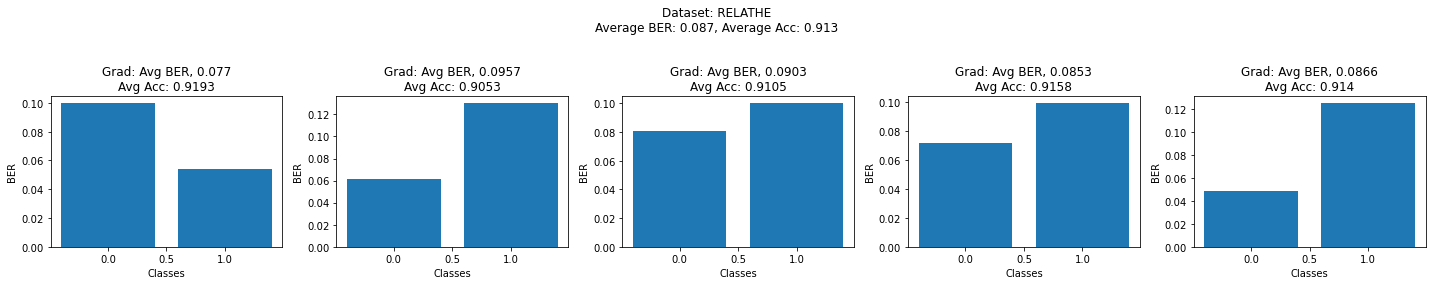
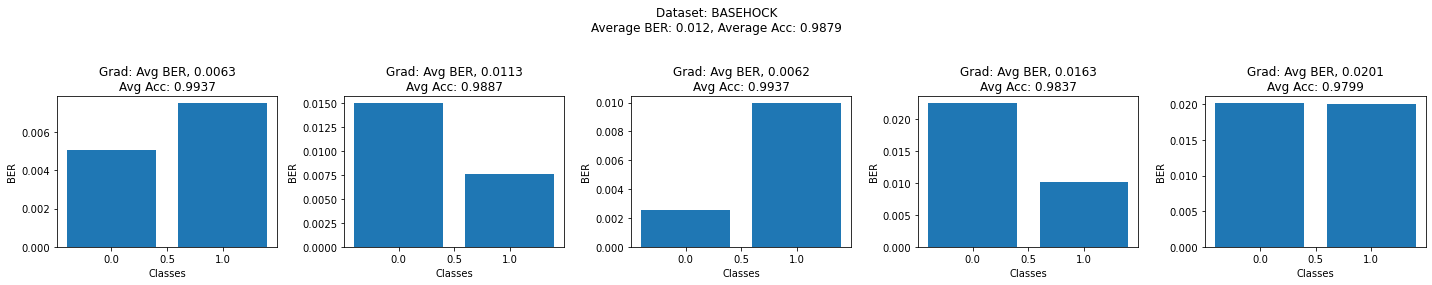
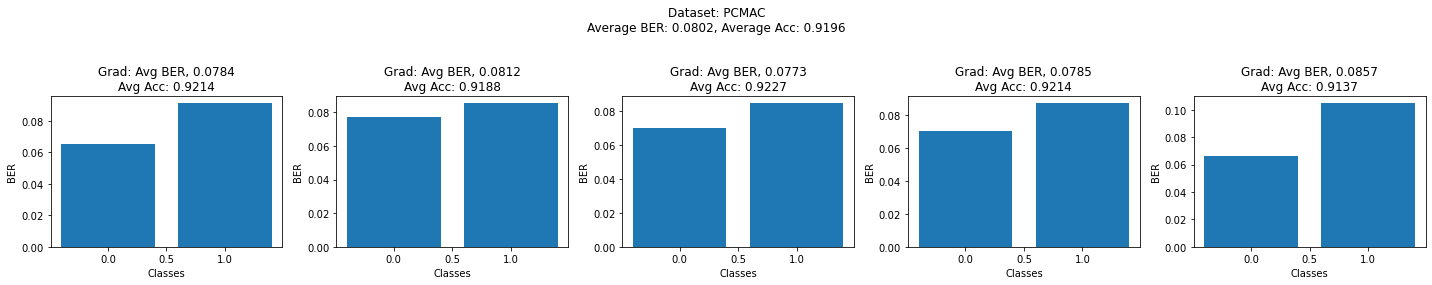

## Subset

## Save RS

In [109]:
# import pickle
# import os
# dataset="PCMAC"
# epoch=100
# for folder in range(5):
#     for percentile in range(10,100,10):
#         rs=[]
#         dictionaries=[]
#         for rs_folder in range(5):
#             ber= pickle.load(open(f"./experiments/scikit_feature/exp_log{folder}/RS/RS{rs_folder}/scikit_feat-subset-RS{rs_folder}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb"))
#             rs.append(ber)
        
#             dictionary= pickle.load(open(f"./experiments/scikit_feature/exp_log{folder}/RS/RS{rs_folder}/scikit_feat-subset-RS{rs_folder}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb")).copy()
#             dictionaries.append({"accuracy":dictionary["accuracy"], "macro avg":{"precision": dictionary["macro avg"]["precision"], "recall": dictionary["macro avg"]["recall"], "f1-score": dictionary["macro avg"]["f1-score"]}})

#         if not os.path.exists(f"./experiments/scikit_feature/exp_log{folder}/RS/subset"):
#             os.mkdir(f"./experiments/scikit_feature/exp_log{folder}/RS/subset")
# #         pickle.dump(np.array(rs).mean(0), open(f"./experiments/scikit_feature/exp_log{folder}/RS/subset/scikit_feat-subset-RS-{dataset}-{percentile}-ber-{epoch}.pkl", "wb"))
#         dictionary= {"accuracy":np.mean([i['accuracy'] for i in dictionaries]), "macro avg":{"precision": np.mean([i['macro avg']['precision'] for i in dictionaries]), "recall":np.mean([i['macro avg']['recall'] for i in dictionaries]), "f1-score":np.mean([i['macro avg']['f1-score'] for i in dictionaries])} }

# #         pickle.dump(dictionary, open(f"./experiments/scikit_feature/exp_log{folder}/RS/subset/scikit_feat-subset-RS-{dataset}-{percentile}-v_dict-{epoch}.pkl", "wb"))        

#### RS: Reduce and Retrain

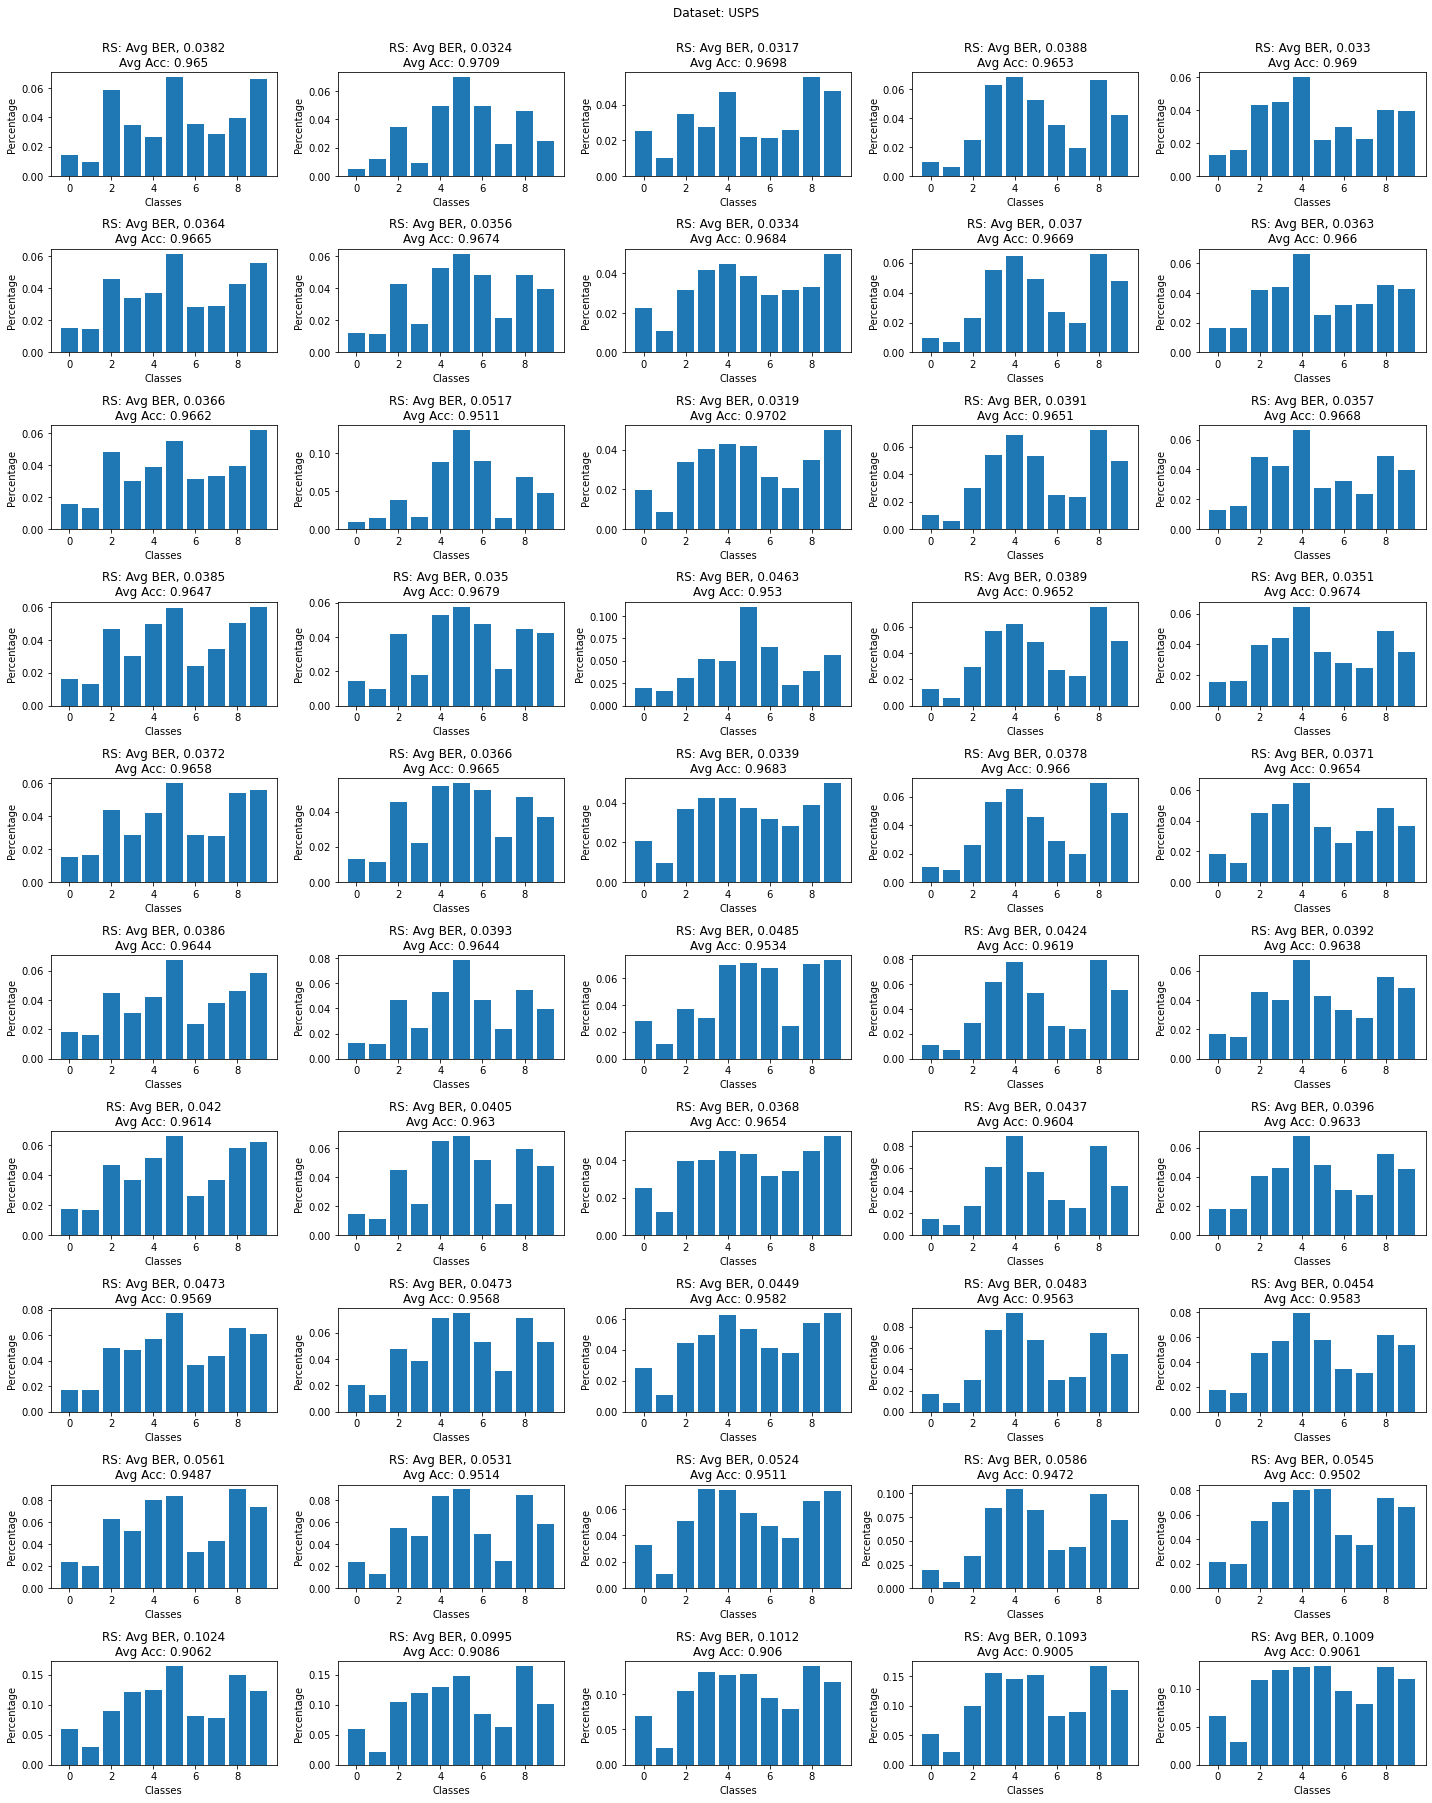

In [96]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
dataset= "BASEHOCK"
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "Grad-AUC":"Grad"} #folder: model
model="RS"
epoch=100

plt.suptitle(f"Dataset: {dataset}",y=1.0 )
fig.set_figheight(25)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{model}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{model}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

#### DF: Reduce and Retrain

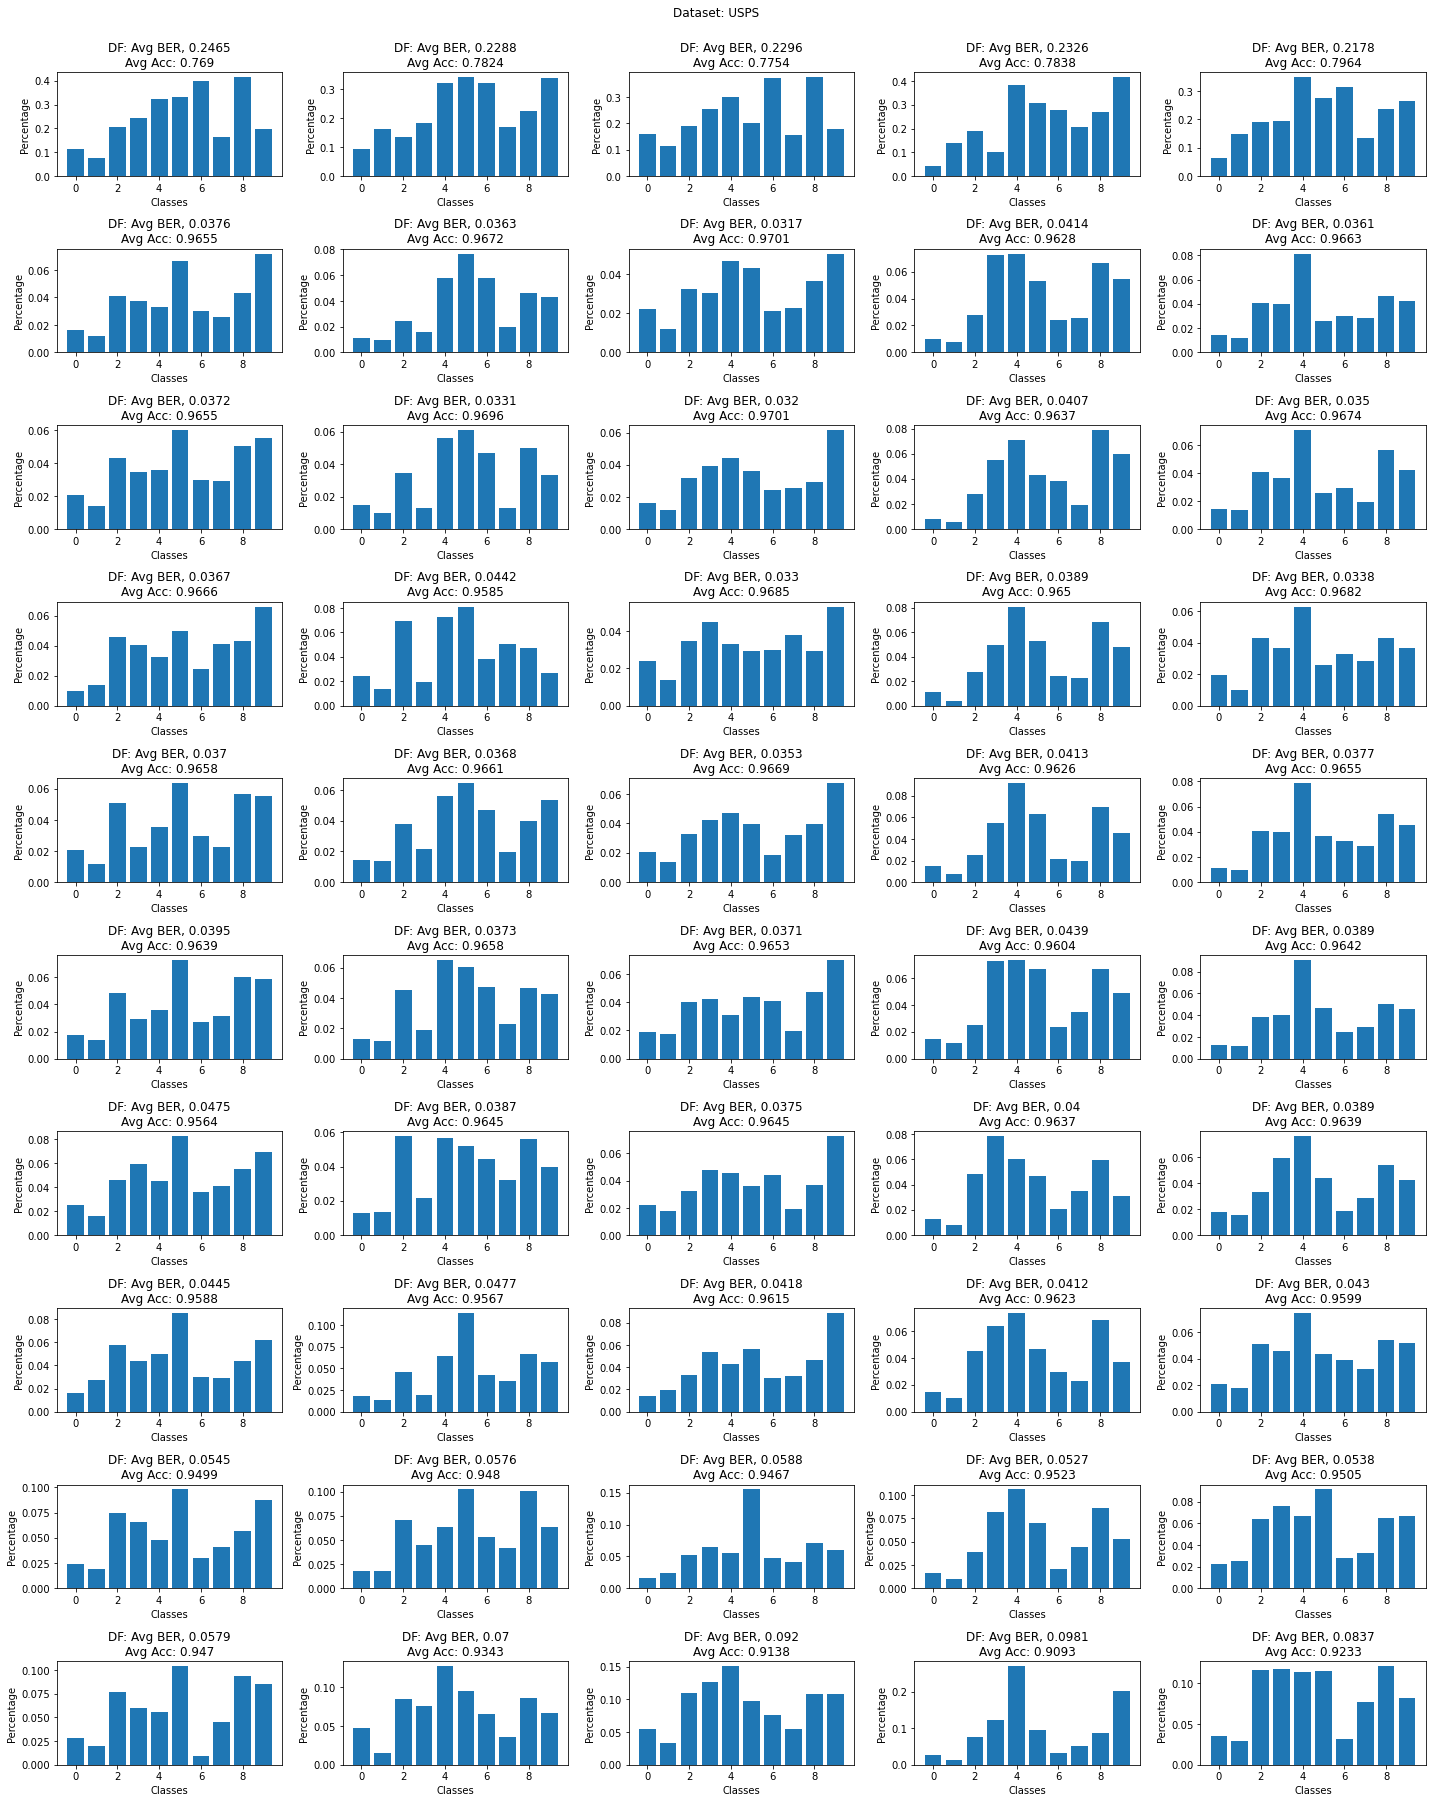

In [116]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

fig, axes= plt.subplots(10,5)
i=0; j=0
dataset= "BASEHOCK"
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", , "Grad-AUC":"Grad"} #folder: model
model="DF"
epoch=100

plt.suptitle(f"Dataset: {dataset}",y=1.0 )
fig.set_figheight(25)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{model}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{model}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

#### NFS: Reduce and Retrain

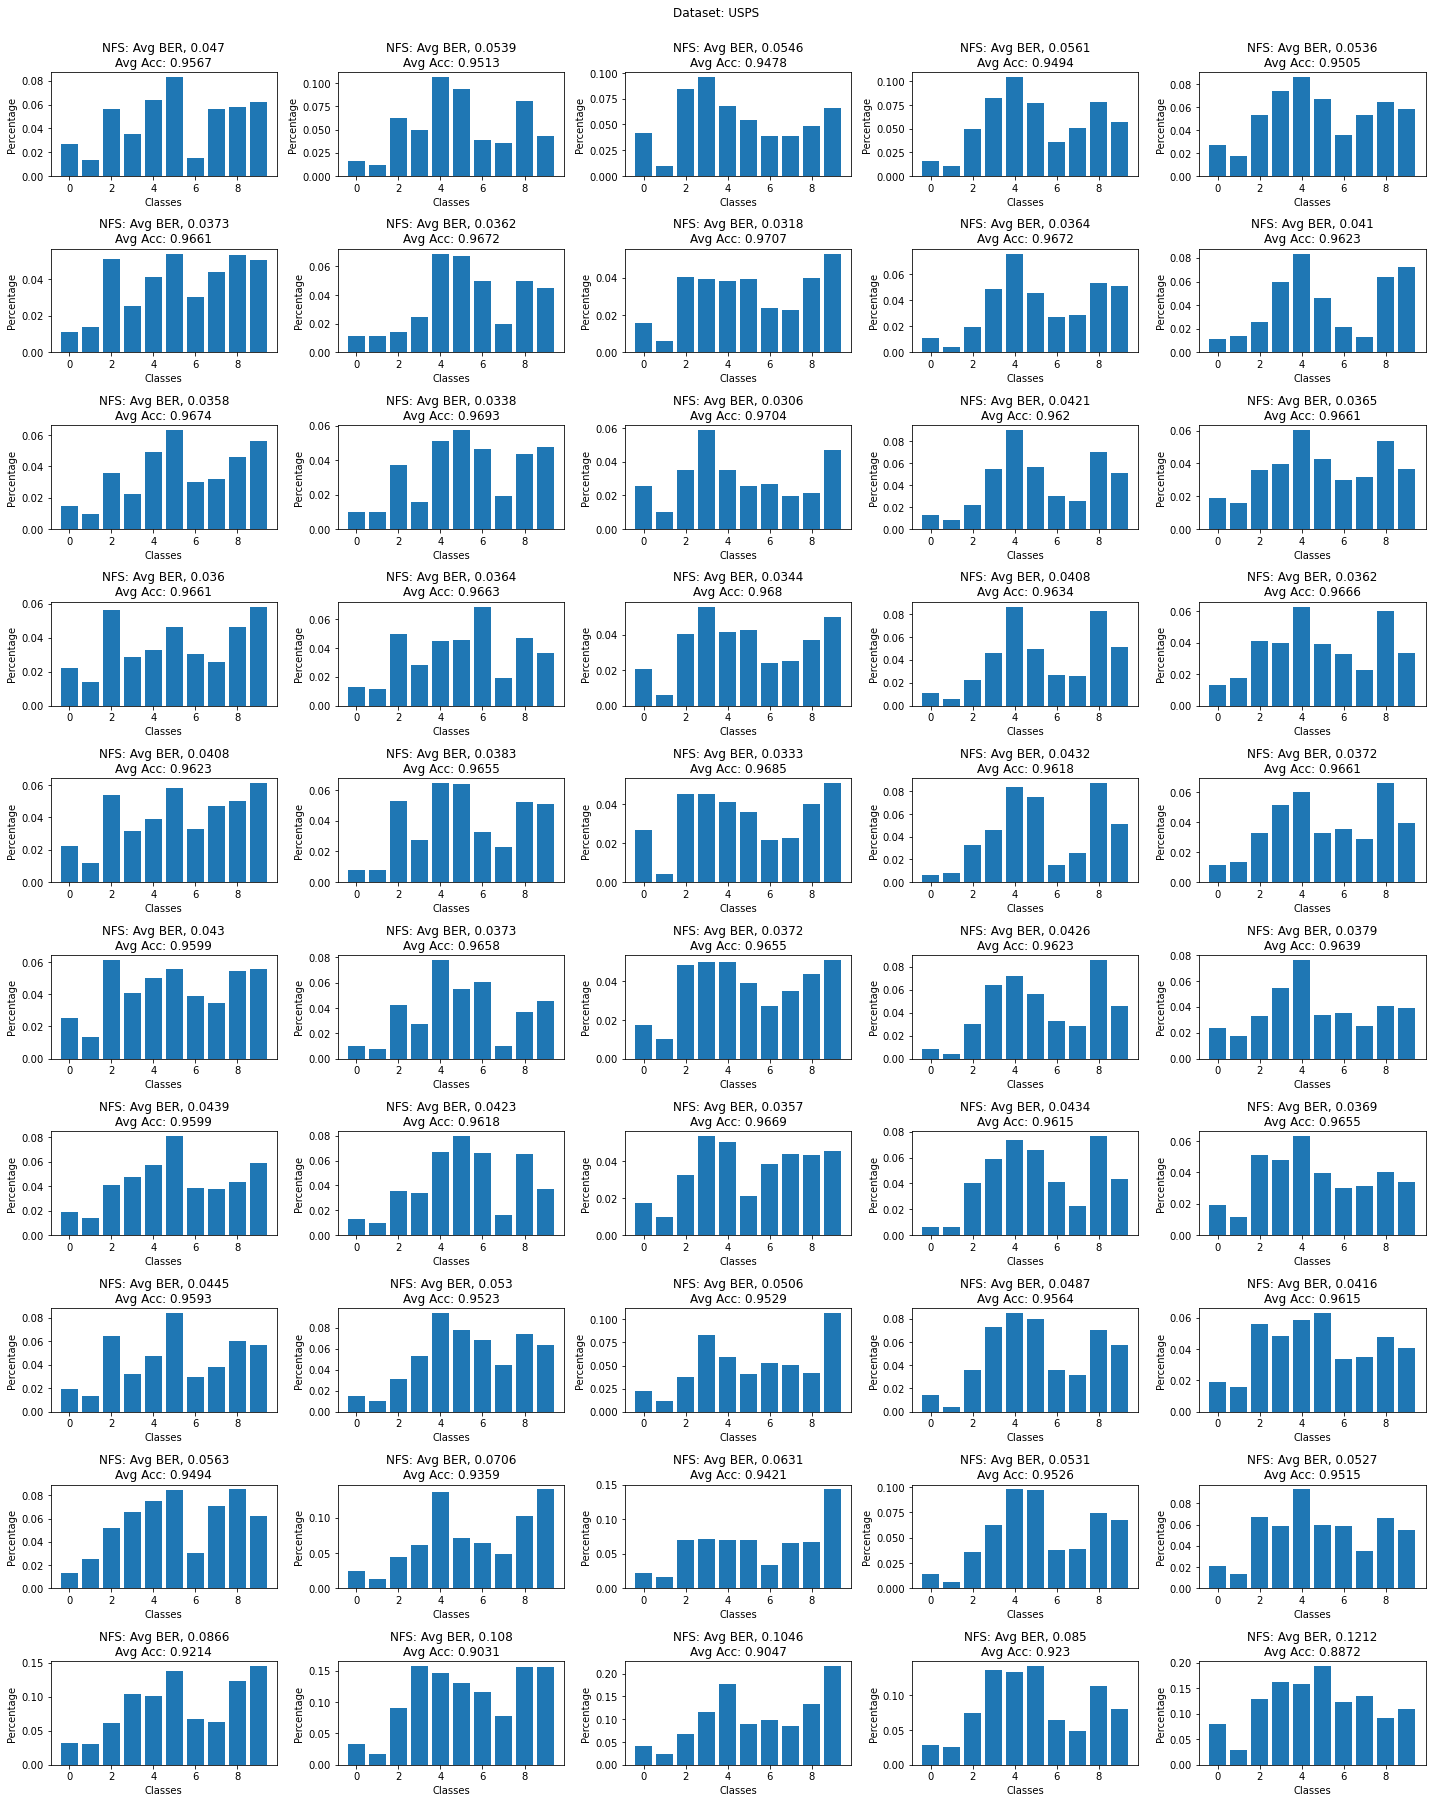

In [120]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

fig, axes= plt.subplots(10,5)
i=0; j=0
dataset= "BASEHOCK"
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "NFS":"NFS", "Grad-AUC":"Grad"} #folder: model
model="NFS"
epoch=100

plt.suptitle(f"Dataset: {dataset}",y=1.0 )
fig.set_figheight(25)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{model}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{model}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

##### Grad: Reduce and Retrain

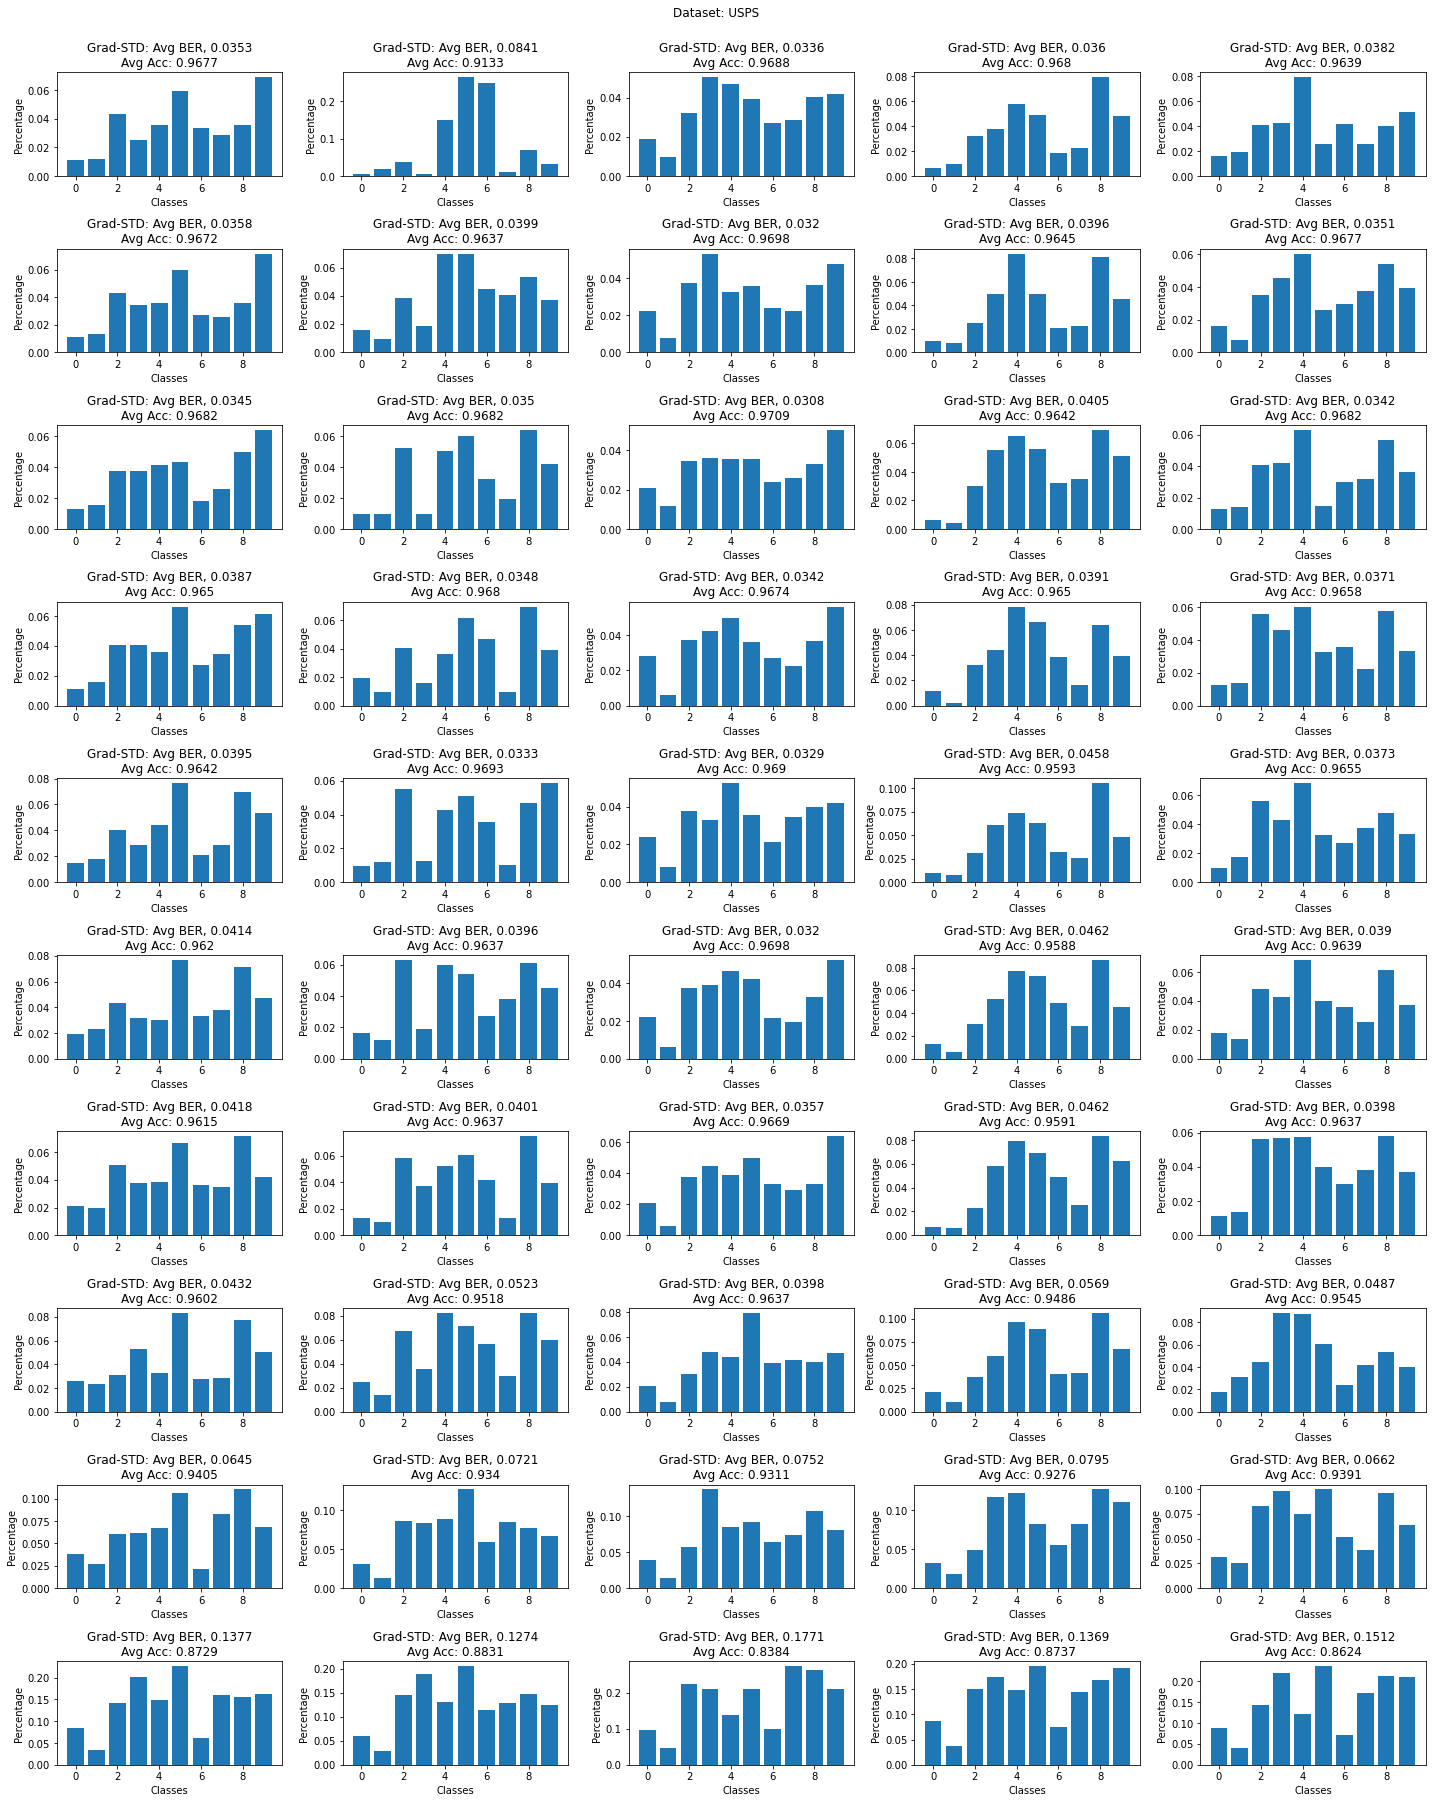

In [127]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

fig, axes= plt.subplots(10,5)
i=0; j=0
dataset= "BASEHOCK"
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "Grad-AUC":"Grad", "Grad-STD":"Grad"} #folder: model
model="Grad-STD"
epoch=100

plt.suptitle(f"Dataset: {dataset}",y=1.0 )
fig.set_figheight(25)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

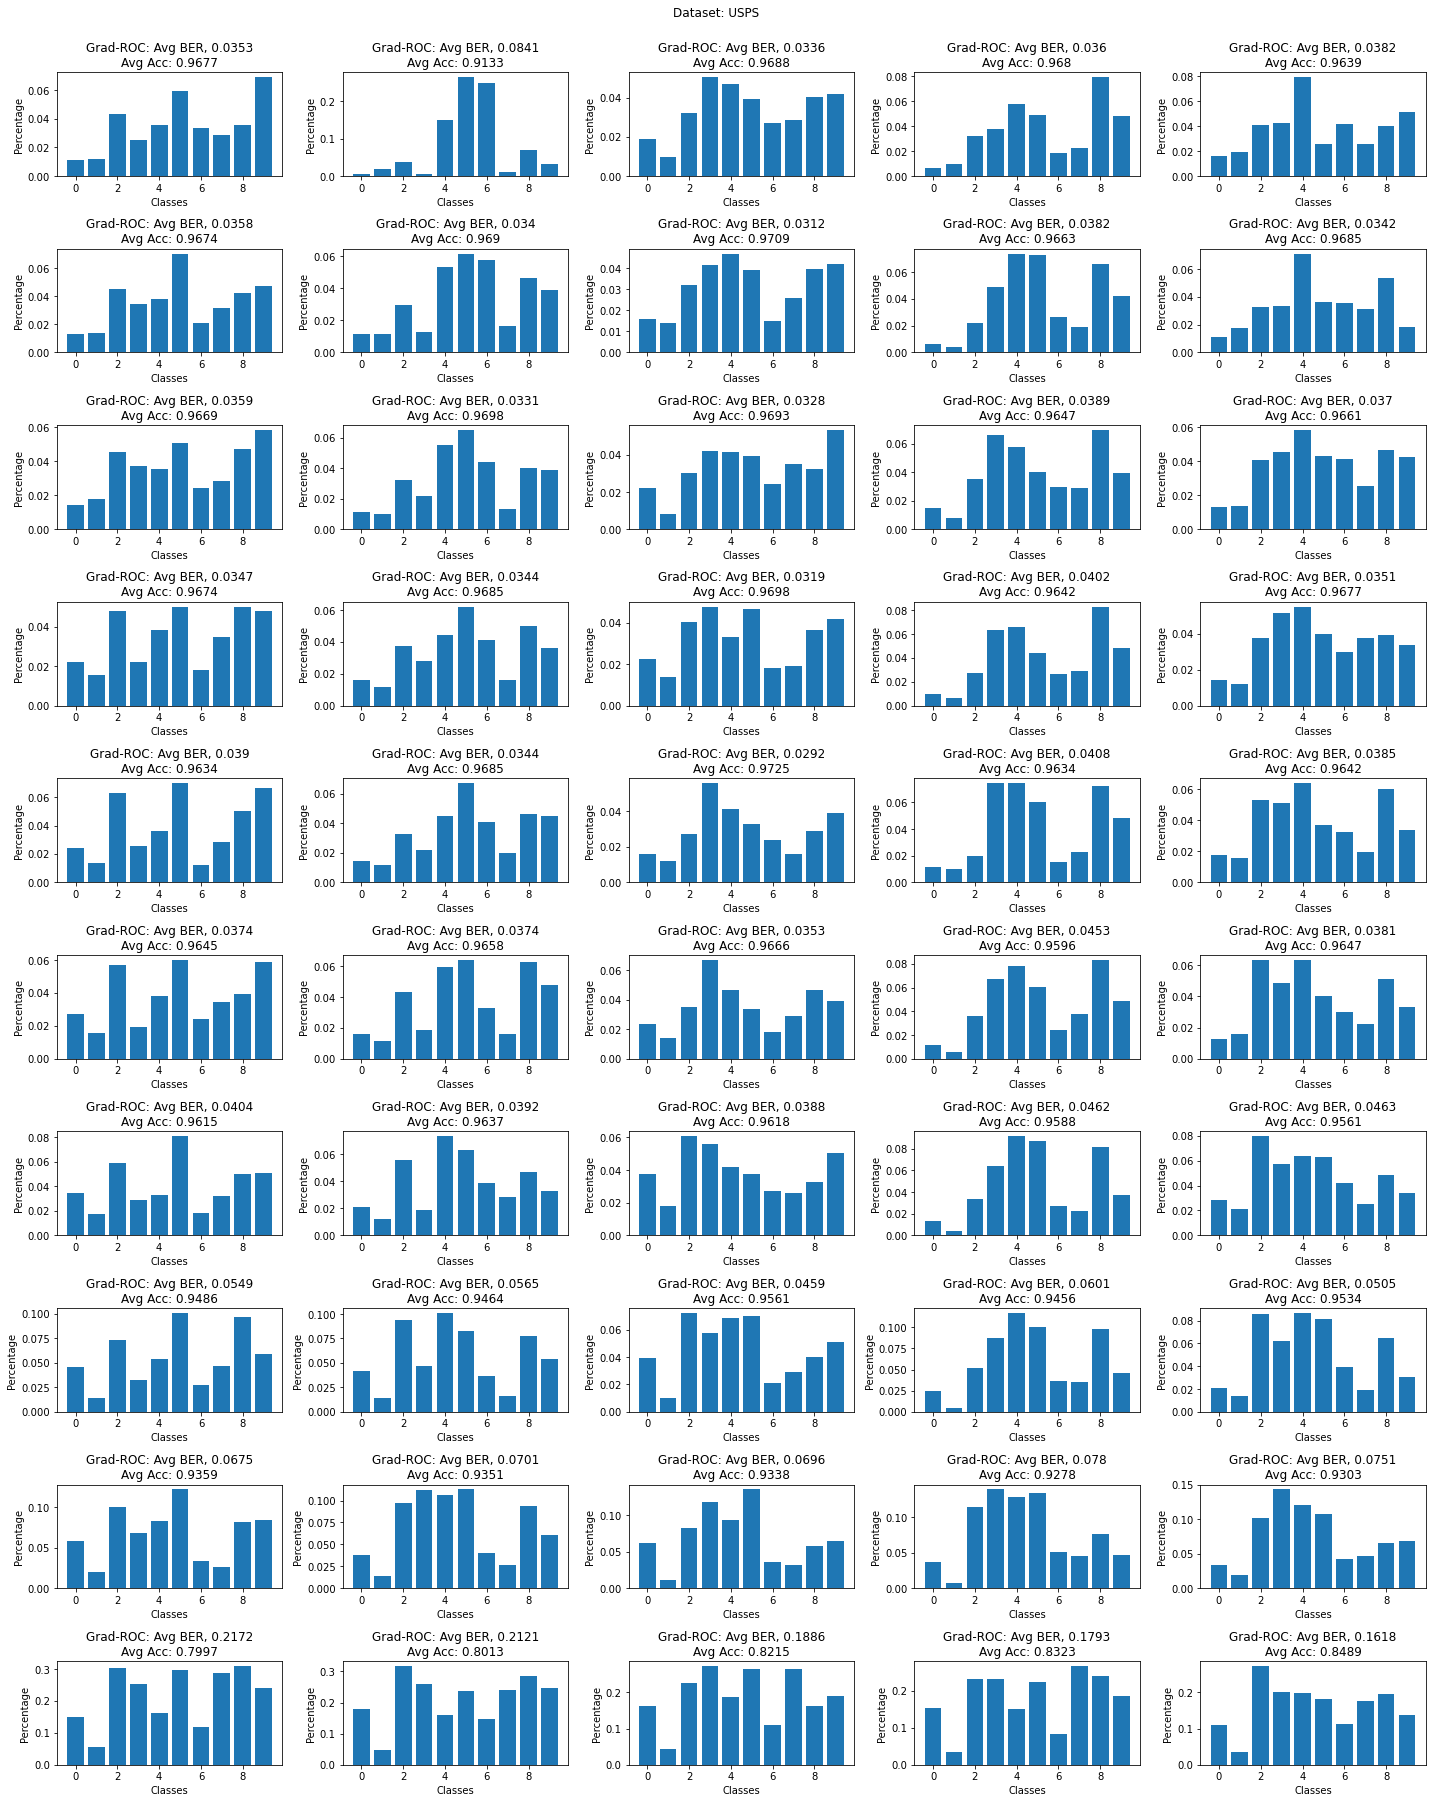

In [129]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

fig, axes= plt.subplots(10,5)
i=0; j=0
dataset= "BASEHOCK"
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "Grad-AUC":"Grad", "Grad-STD":"Grad", "Grad-ROC":"Grad"} #folder: model
model="Grad-ROC"
epoch=100

plt.suptitle(f"Dataset: {dataset}",y=1.0 )
fig.set_figheight(25)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

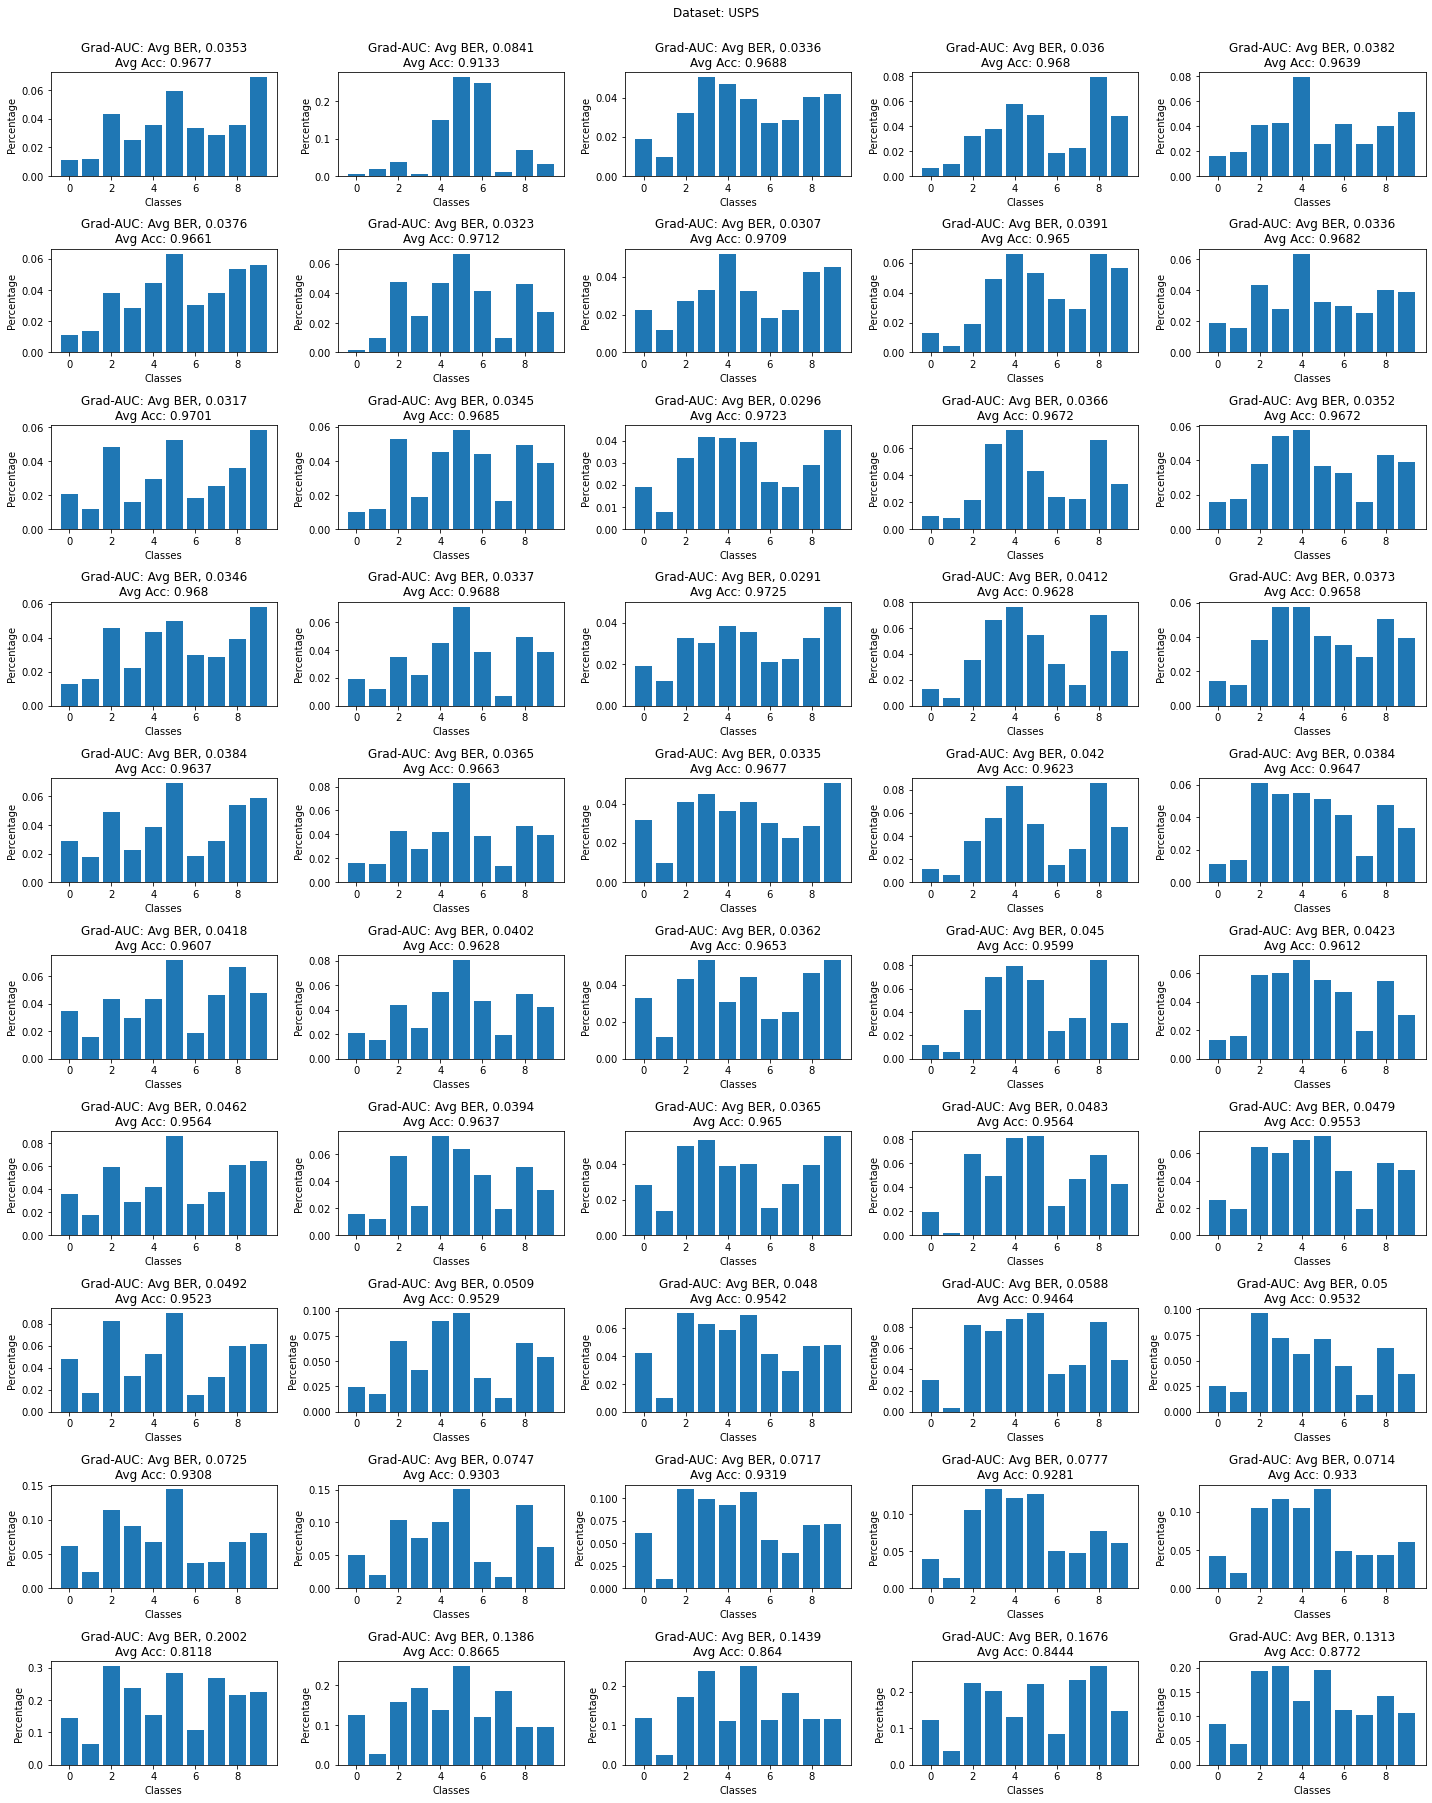

In [121]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

fig, axes= plt.subplots(10,5)
i=0; j=0
dataset= "BASEHOCK"
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "Grad-AUC":"Grad", "Grad-STD":"Grad", "Grad-ROC":"Grad"} #folder: model
model="Grad-AUC"
epoch=100

plt.suptitle(f"Dataset: {dataset}",y=1.0 )
fig.set_figheight(25)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/scikit_feat-{original_dict[model]}-{dataset}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/scikit_feature/exp_log{folder}/{original_dict[model]}/subset/scikit_feat-subset-{model}-{dataset}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## Subset

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

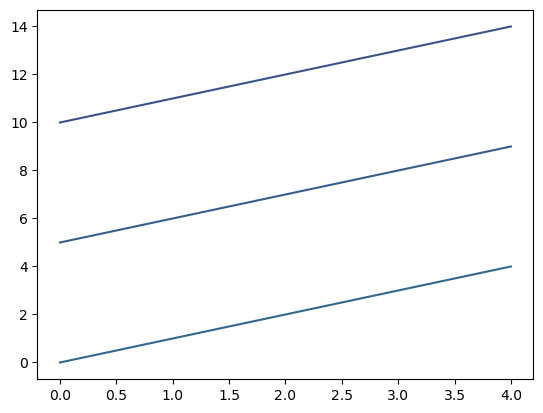

In [4]:
rocket_palette= sns.color_palette("rocket",as_cmap=True)
mako_palette= sns.color_palette("mako",as_cmap=True)
viridis_palette= sns.color_palette("viridis_r",as_cmap=True)
# palette.colors[0]
plt.plot(np.arange(5),color=viridis_palette.colors[170])
plt.plot(np.arange(5,10),color=viridis_palette.colors[180]) 
plt.plot(np.arange(10,15),color=viridis_palette.colors[190])

In [3]:
complete_set= [("RS", "RS"),("Fisher","Fisher"), ("FScore", "FScore"),("DF","DF"),("NFS", "NFS"),("Weight", "Weight"), ("Grad", "Grad-AUC"), ("Grad","Grad-ROC"), ("Grad", "Grad-STD")]

In [11]:
name_set= [("RS", "RS"),("Fisher","Fisher"), ("FScore", "FScore"),("DF","DF"),("NFS", "NFS"),("Weight", "Weight-Naive"), ("Grad", "Grad-AUC"), ("Grad","Grad-ROC"), ("Grad", "Grad-STD")]

In [22]:
existing_methods= [("Fisher","Fisher"), ("FScore", "FScore"),("RS", "RS"),("DF","DF")]

In [474]:
simul_comparison= [("Weight", "Weight"), ("ThresholdedWeight", "ThresholdedWeight"), ("RS", "RS"),("DF","DF")]

In [169]:
grad_comparison= [("Grad","Grad-sum"), ("Grad", "Grad-std"), ("RS", "RS"),("DF","DF")]

In [80]:
developing_methods= [("Grad","Grad-sum"), ("Grad", "Grad-std"), ("Weight", "Weight"), ("ThresholdedWeight", "ThresholdedWeight")]

In [5]:
import seaborn as sns
# palette= sns.color_palette(as_cmap=True)
rocket_palette= sns.color_palette("rocket",as_cmap=True)
viridisr_palette= sns.color_palette("viridis_r",as_cmap=True)
viridis_palette= sns.color_palette("viridis",as_cmap=True)
colour={}
# for i, j in zip(range(len(complete_set)), [z[1] for z in complete_set]):
#     colour[j]= i

colour["RS"]= rocket_palette.colors[100]

for i, j in zip(['Fisher', 'FScore'], [rocket_palette.colors[160], rocket_palette.colors[210]]):
    colour[i]= j
    
for i, j in zip(["DF", "NFS", "Weight"], [viridisr_palette.colors[190], viridisr_palette.colors[215], viridisr_palette.colors[250]]):
    colour[i]= j
    
for i, j in zip(["Grad-AUC", "Grad-ROC", "Grad-STD"], [viridis_palette.colors[140], viridis_palette.colors[190], viridis_palette.colors[220]]):
    colour[i]=j
colour

{'RS': [0.61792306, 0.10325288, 0.35760108],
 'Fisher': [0.92676657, 0.29823282, 0.24285536],
 'FScore': [0.96403203, 0.65122535, 0.4932578],
 'DF': [0.227802, 0.326594, 0.546532],
 'NFS': [0.270595, 0.214069, 0.507052],
 'Weight': [0.273809, 0.031497, 0.358853],
 'Grad-AUC': [0.119423, 0.611141, 0.538982],
 'Grad-ROC': [0.35236, 0.783011, 0.392636],
 'Grad-STD': [0.636902, 0.856542, 0.21662]}

## BER

In [6]:
dataset="BASEHOCK"
ber_dictionary={}
cr_dictionary={}
for_range= range(90,-10,-10)
epoch=100
# model_list= existing_methods+[("Simul", "Simul"), ("ThresholdedSimul", "ThresholdedSimul")] # simul
# model_list= developing_methods #s+[("RS", "RS"), ("DF", "DF")]
# model_list=[("Grad","Grad-sum"), ("Grad", "Grad-std"), ("DF", "DF")] # grad
# model_list= grad_comparison+[("Simul", "Simul"), ("Fisher","Fisher"), ("FScore", "FScore")] # outlier
# model_list= developing_methods+[("Fisher","Fisher"), ("FScore", "FScore")]
model_list= complete_set
for model_dir, model in model_list:
    ber={}
    dictionary={}
    for folder in ["0", "1", "2", "3","4"]:
        ber[folder]=[]
        dictionary[folder]=[]
        for percentage in [str(i) for i in for_range]:
            ber[folder].append( np.mean( pickle.load(open(f"./experiments/scikit_feature/exp_log{folder}/{model_dir}/subset/scikit_feat-subset-{model}-{dataset}-{percentage}-ber-{epoch}.pkl", "rb")) ) )
            tmp= pickle.load(open(f"./experiments/scikit_feature/exp_log{folder}/{model_dir}/subset/scikit_feat-subset-{model}-{dataset}-{percentage}-v_dict-{epoch}.pkl", "rb") )
            dictionary[folder].append( tmp  )
    ber_dictionary[model]= ber
    cr_dictionary[model]= dictionary
    
ber_dictionary_average_plt={}
ber_dictionary_average_sns={}
cr_dictionary_average_plt={}
cr_dictionary_average_sns={}
for i in ber_dictionary.keys():
    average=[]
    metrics_report=[]
    for j in ber_dictionary[i].keys():
        average.append(ber_dictionary[i][j])
        metrics_report.append( [ z["macro avg"]["f1-score"] for z in cr_dictionary[i][j] ] )
#     print(average)
    ber_dictionary_average_sns[i]= average#np.array(average).mean(axis=0)
    ber_dictionary_average_plt[i]= np.array(average).mean(axis=0)    
    cr_dictionary_average_sns[i]= metrics_report
    cr_dictionary_average_plt[i]= np.array(metrics_report).mean(axis=0)
# dictionary_average

In [12]:
np.array(ber_dictionary_average_sns['Grad-AUC'])[:,-1].shape

(5,)

In [15]:
# T Tests

# from scipy.stats import ttest_ind

# res = ttest_ind(np.array(ber_dictionary_average_sns['Grad-AUC'])[:,-1],
#                 np.array(ber_dictionary_average_sns['Grad-STD'])[:,-1])

# print(res) # pvalue small= significantly different, large= no difference

Ttest_indResult(statistic=0.0, pvalue=1.0)


In [1]:
# print(dataset)
# for i in ber_dictionary_average_plt.keys():
#     print(i)
#     for j in np.flip(ber_dictionary_average_plt[i]):
#         print(round(j, 4), end="")
#         print(" & ", end="")
# #     print(i, np.flip(dictionary_average_plt[i]) ) 
#     print(); print()

In [40]:
print(dataset, "AUC") # larger it is, worse it is
for i in ber_dictionary_average_plt.keys():
#     print()
#     for j in np.flip(cr_dictionary_average_plt[i])[1:]:
#         print(round(j, 4), end="")
#         print(" & ", end="")
    print(i, round(np.trapz(np.flip(ber_dictionary_average_plt[i])[1:]),4) ) 
    print(); print()

USPS AUC
RS 0.3671


Fisher 0.5


FScore 0.5021


DF 0.348


NFS 0.3668


Weight 0.4346


Grad-AUC 0.4117


Grad-ROC 0.4269


Grad-STD 0.4009




In [2]:
# print(dataset)
# for i in cr_dictionary_average_plt.keys():
#     print(i)
#     for j in np.flip(cr_dictionary_average_plt[i]):
#         print(round(j, 4), end="")
#         print(" & ", end="")
# #     print(i, np.flip(dictionary_average_plt[i]) ) 
#     print(); print()

Text(0.5, 0.98, 'RELATHE: Reduce and Retrain')

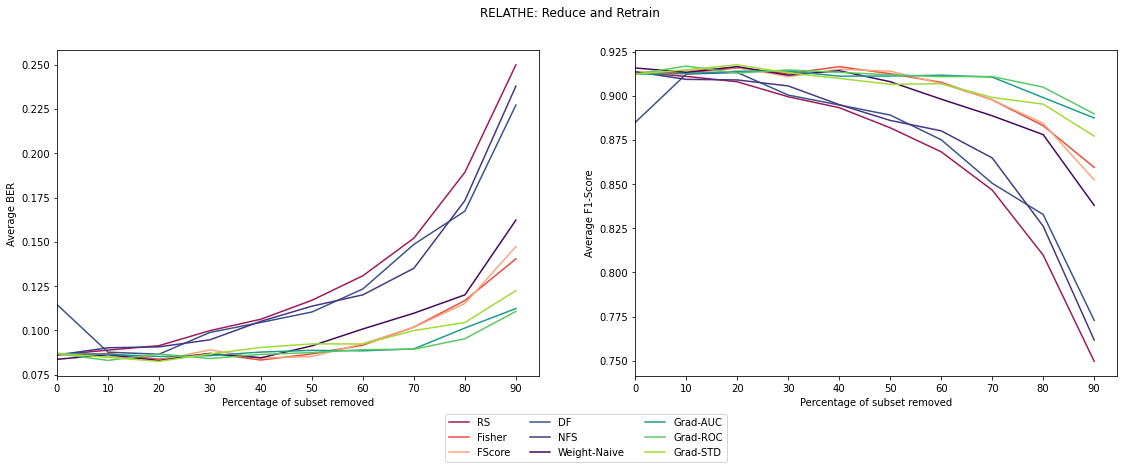

In [37]:
plt.figure(figsize=(19,6))
plt.subplot(1,2,1)
for i in ber_dictionary_average_plt.keys():
#     plt.plot( np.flip(ber_dictionary_average_plt[i]),color=palette[colour[i]] )
    plt.plot( np.flip(ber_dictionary_average_plt[i]),color=colour[i] )    
# plt.legend(ber_dictionary_average_plt.keys(), ncol=3, loc=2)
plt.ylabel("Average BER")
plt.xlabel("Percentage of subset removed")
plt.xlim(0)
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
# dictionary_average_sns

plt.subplot(1,2,2)
for i in cr_dictionary_average_plt.keys():
    plt.plot( np.flip(cr_dictionary_average_plt[i]),color=colour[i] )
    
# plt.legend(cr_dictionary_average_plt.keys(), ncol=3, bbox_to_anchor=(0.2,-0.1))
plt.legend([j for i, j in name_set], ncol=3, bbox_to_anchor=(0.2,-0.1))
plt.ylabel("Average F1-Score")
plt.xlabel("Percentage of subset removed")
plt.xlim(0)
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
plt.suptitle(f"{dataset}: Reduce and Retrain")

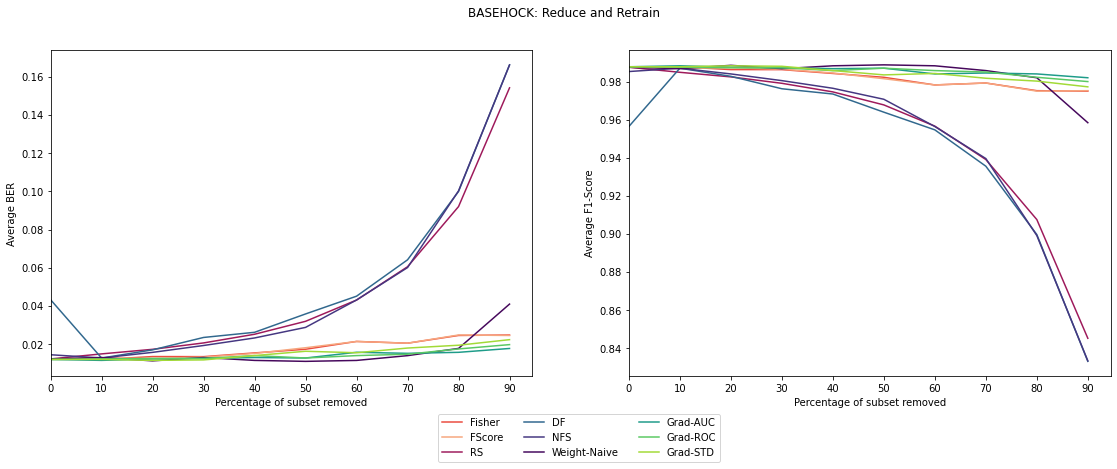

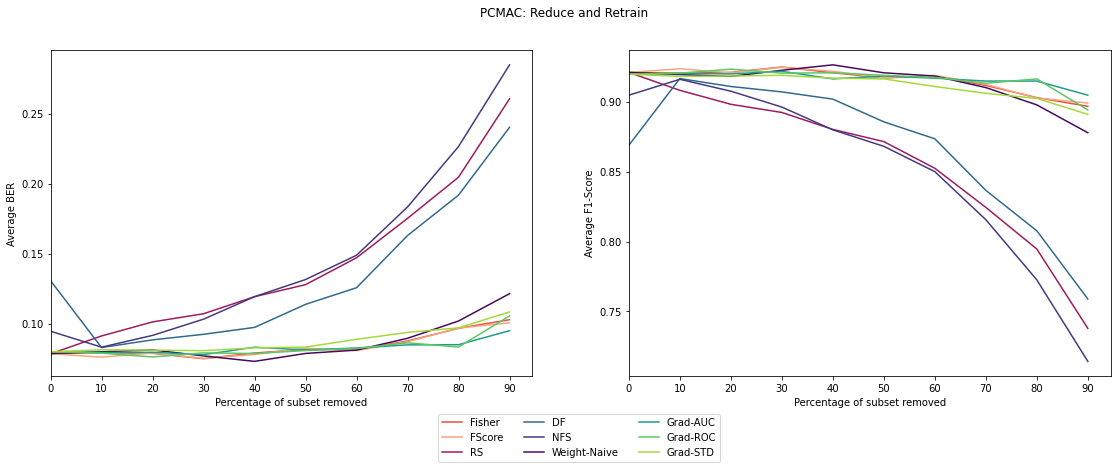

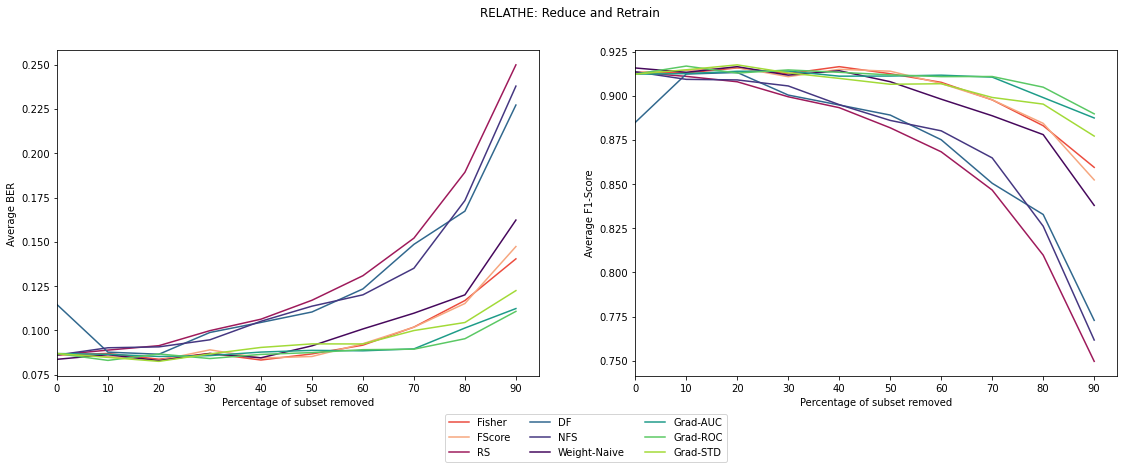

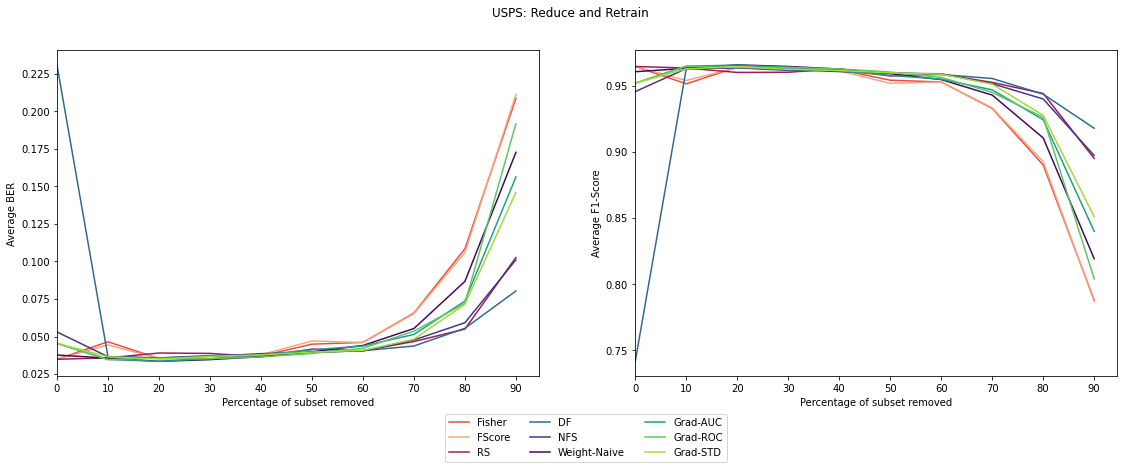